In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import xgboost.sklearn as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
path = '/Users/macbookair/Desktop/南厂油漆车间数据.csv'

In [16]:
ori_data = pd.read_csv(path)
row,col = ori_data.shape

In [17]:
ori_data

,日期,电能,天然气,E16,E15,E2SB,LCAR,A10,E2LB,均温,均湿,最高温度,最低温度
0,2016/1/1,17492.52,0,0.0,0.0,0.0,0.0,0.0,0.0,8.938418,58.740637,14.548875,2.882875
1,2016/1/2,23772.52,0,0.0,0.0,0.0,0.0,0.0,0.0,13.956948,53.095026,18.389002,11.153124
2,2016/1/3,35885.99,2682,0.0,0.0,0.0,0.0,0.0,0.0,14.789503,57.830396,18.862251,11.322376
3,2016/1/4,116411.77,8521,372.0,381.0,0.0,84.0,83.0,0.0,13.600098,73.020699,15.566503,11.648624
4,2016/1/5,117432.96,8899,394.0,394.0,0.0,79.0,95.0,0.0,10.035416,78.385667,12.899375,8.185251
5,2016/1/6,117665.56,8610,390.0,353.0,0.0,113.0,89.0,1.0,9.343798,66.683141,10.698750,8.205000
6,2016/1/7,117087.85,8641,369.0,356.0,0.0,85.0,81.0,0.0,8.237359,63.435271,10.319501,5.780000
7,2016/1/8,117795.66,8746,374.0,402.0,0.0,56.0,60.0,0.0,5.440762,45.858117,7.012499,3.569000
8,2016/1/9,118548.61,8655,376.0,356.0,0.0,81.0,108.0,3.0,6.800521,48.631727,10.332998,2.714500
9,2016/1/10,117389.75,8628,412.0,378.0,0.0,97.0,89.0,0.0,10.716979,63.688904,12.421000,8.831375


In [18]:
def newData(data):
    weekday = ori_data['日期'].tolist()
    days = []
    for day in weekday:
        days.append(datetime.strptime(day,'%Y/%m/%d').weekday()+1)
    days = pd.DataFrame(days)
    days.columns = ['day']
    data = ori_data.join(days)
    work = np.array(data['E15'].tolist())
    workday = np.where(work>0,1,0)
    workday = pd.DataFrame(workday)
    workday.columns = ['workday']
    data = data.join(workday)
    return data
data = newData(ori_data)
new_date = []
weekday = ori_data['日期'].tolist()
for month in weekday:
    new_date.append(int(month.split('/')[1]))
month = pd.DataFrame(new_date)
month.columns = ['month']
data = data.join(month)
nan = data[data.isnull().values==True].index.values
nan = np.unique(nan)
nanData = data.ix[nan]
# nanindex0 = nanData[nanData['workday'] == 0].index.values
# nanindex1 = nanData[nanData['workday'] == 1].index.values
# data.ix[nanindex0] = data.ix[nanindex0].fillna(0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [19]:
data = data.dropna(axis=0)

In [20]:
data.describe()

,电能,天然气,E16,E15,E2SB,LCAR,A10,E2LB,均温,均湿,最高温度,最低温度,day,workday,month
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,83960.238637,7715.187761,13.762170,124.756606,53.429764,33.727399,125.791377,234.164117,19.416059,62.500398,22.698027,16.488271,4.002782,0.479833,6.489569
std,41376.394093,4888.832471,78.022909,151.456873,117.069606,88.507971,92.542685,193.679942,8.944743,10.397443,9.340290,8.994616,1.997908,0.499941,3.452760
min,11649.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.881979,33.499965,-4.406750,-7.851500,1.000000,0.000000,1.000000
25%,29262.625000,1457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.752327,56.384985,14.870937,8.541999,2.000000,0.000000,3.500000
50%,109204.330000,9321.000000,0.000000,0.000000,0.000000,0.000000,173.000000,322.000000,19.986138,63.168948,23.339872,16.931499,4.000000,0.000000,6.000000
75%,113905.060000,12203.500000,0.000000,263.500000,0.000000,0.000000,208.000000,405.500000,26.567560,69.775509,29.793063,23.985940,6.000000,1.000000,9.000000
max,127144.740000,13714.000000,572.000000,518.000000,553.000000,338.000000,265.000000,618.000000,36.163173,86.360344,41.100624,32.472248,7.000000,1.000000,12.000000


In [21]:
data=data.drop(['workday'],axis=1)

In [22]:
dummies = pd.get_dummies(data['day'],prefix='day')
data = data.join(dummies)
data = data.drop(['day'],axis=1)

In [23]:
dummies = pd.get_dummies(data['month'],prefix='month')
data = data.join(dummies)
data = data.drop(['month'],axis=1)

In [24]:
data.describe()

,电能,天然气,E16,E15,E2SB,LCAR,A10,E2LB,均温,均湿,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,...,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,83960.238637,7715.187761,13.762170,124.756606,53.429764,33.727399,125.791377,234.164117,19.416059,62.500398,...,0.086231,0.083449,0.083449,0.083449,0.086231,0.086231,0.082058,0.075104,0.083449,0.086231
std,41376.394093,4888.832471,78.022909,151.456873,117.069606,88.507971,92.542685,193.679942,8.944743,10.397443,...,0.280900,0.276753,0.276753,0.276753,0.280900,0.280900,0.274645,0.263743,0.276753,0.280900
min,11649.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.881979,33.499965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29262.625000,1457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.752327,56.384985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,109204.330000,9321.000000,0.000000,0.000000,0.000000,0.000000,173.000000,322.000000,19.986138,63.168948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113905.060000,12203.500000,0.000000,263.500000,0.000000,0.000000,208.000000,405.500000,26.567560,69.775509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,127144.740000,13714.000000,572.000000,518.000000,553.000000,338.000000,265.000000,618.000000,36.163173,86.360344,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data = data.drop(['日期'],axis=1)

In [26]:
data.columns

Index(['电能', '天然气', 'E16', 'E15', 'E2SB', 'LCAR', 'A10', 'E2LB', '均温', '均湿',
       '最高温度', '最低温度', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [28]:
data['E16'] = data['E16']*(121/(121+110+108.3+94.5+106.5+112.4))
data['E15'] = data['E15']*(1110/(121+110+108.3+94.5+106.5+112.4))
data['E2SB'] = data['E2SB']*(108.3/(121+110+108.3+94.5+106.5+112.4))
data['LCAR'] = data['LCAR']*(94.5/(121+110+108.3+94.5+106.5+112.4))
data['A10'] = data['A10']*(106.5/(121+110+108.3+94.5+106.5+112.4))
data['E2LB'] = data['E2LB']*(112.4/(121+110+108.3+94.5+106.5+112.4))

In [29]:
ee = data.values[:,0]
gas = data.values[:,1]
x  = data.values[:,2:19]
m = np.shape(ee)

In [30]:
#电能预测
X_train, X_test, y_train, y_test = train_test_split(x,ee, test_size=0.3, random_state=0)
parameters = {'max_depth':([3,4,5,6,7,8,9,10]),'learning_rate':(0.01,0.02,0.03,0.04,0.05,0.06,0.09,0.1,0.11),'n_estimators':[100,125,150,175,200,250,300,400,500,600,700]}
xlf=xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=300)
clf = GridSearchCV(xlf,parameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
print(clf.best_score_,clf.best_params_)

[0]	validation_0-rmse:85998.2
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:77621.9
[2]	validation_0-rmse:70050.5
[3]	validation_0-rmse:63179.1
[4]	validation_0-rmse:56984.6
[5]	validation_0-rmse:51539.7
[6]	validation_0-rmse:46544.2
[7]	validation_0-rmse:42116.1
[8]	validation_0-rmse:38101.5
[9]	validation_0-rmse:34492.4
[10]	validation_0-rmse:31245
[11]	validation_0-rmse:28372.1
[12]	validation_0-rmse:25815.2
[13]	validation_0-rmse:23492.1
[14]	validation_0-rmse:21466
[15]	validation_0-rmse:19626.2
[16]	validation_0-rmse:17986.7
[17]	validation_0-rmse:16531.2
[18]	validation_0-rmse:15287.8
[19]	validation_0-rmse:14153.5
[20]	validation_0-rmse:13184.4
[21]	validation_0-rmse:12316.7
[22]	validation_0-rmse:11579
[23]	validation_0-rmse:10924.7
[24]	validation_0-rmse:10367.5
[25]	validation_0-rmse:9901.3
[26]	validation_0-rmse:9450.86
[27]	validation_0-rmse:9068.3
[28]	validation_0-rmse:8745.69
[29]	validation_0-rmse:8493.5
[30]	validation_0-rmse:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,ee,test_size=0.3, random_state=0)
xlf = xgb.XGBRegressor(max_depth=5, 
                        learning_rate=0.06, 
                        n_estimators=125, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=1000)
preds = xlf.predict(X_test)

[0]	validation_0-rmse:89735.9
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:84417.3
[2]	validation_0-rmse:79546.7
[3]	validation_0-rmse:74868.7
[4]	validation_0-rmse:70492.7
[5]	validation_0-rmse:66371
[6]	validation_0-rmse:62483.1
[7]	validation_0-rmse:58864.7
[8]	validation_0-rmse:55445.6
[9]	validation_0-rmse:52199.8
[10]	validation_0-rmse:49196.4
[11]	validation_0-rmse:46311
[12]	validation_0-rmse:43640.5
[13]	validation_0-rmse:41187.2
[14]	validation_0-rmse:39175.7
[15]	validation_0-rmse:36967.7
[16]	validation_0-rmse:34860.6
[17]	validation_0-rmse:32882.1
[18]	validation_0-rmse:31055.5
[19]	validation_0-rmse:29312.8
[20]	validation_0-rmse:27681.5
[21]	validation_0-rmse:26181.4
[22]	validation_0-rmse:24797.6
[23]	validation_0-rmse:23464
[24]	validation_0-rmse:22212.8
[25]	validation_0-rmse:21022.9
[26]	validation_0-rmse:19948.4
[27]	validation_0-rmse:18924
[28]	validation_0-rmse:17973.6
[29]	validation_0-rmse:17082.6
[30]	validation_0-rms

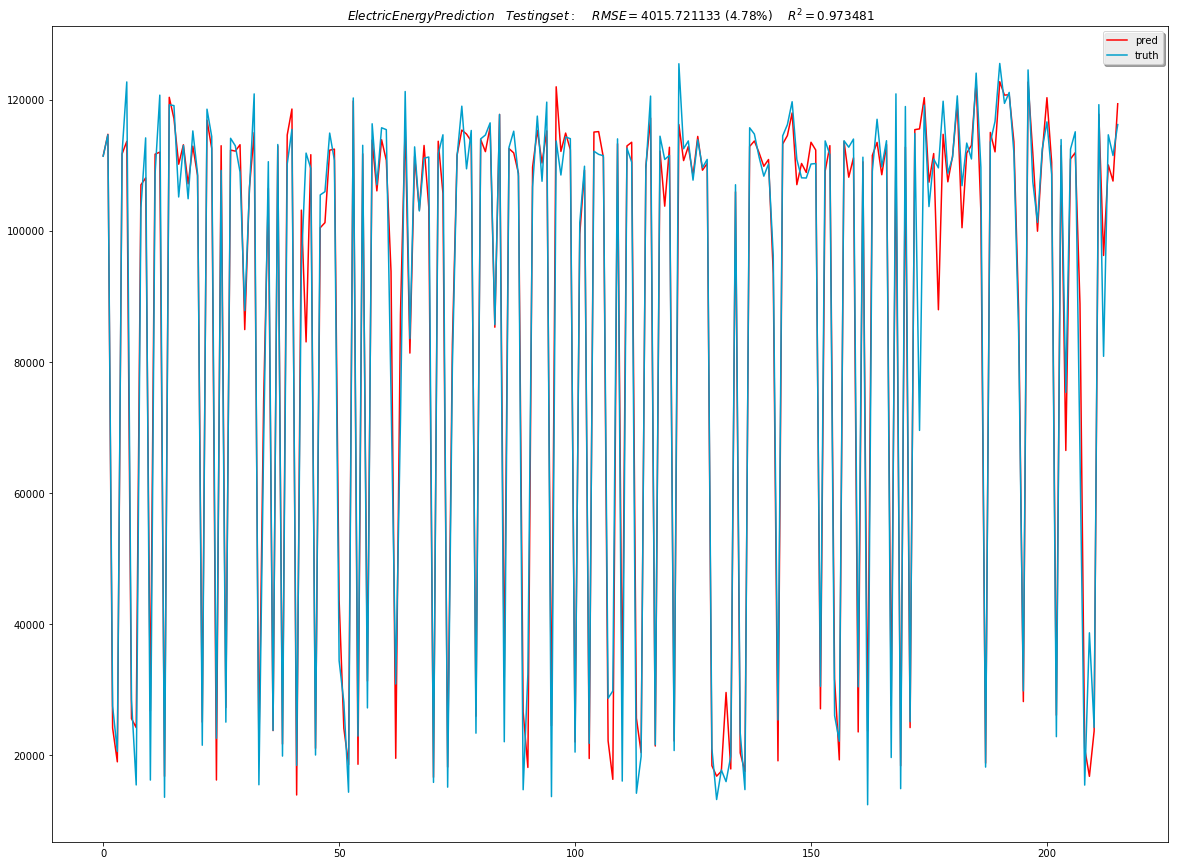

In [32]:
rmse  = (np.sqrt((y_test-preds)**2)).mean()
score = r2_score(y_test,preds)
mean  = data['电能'].mean()
ratio = (rmse/mean)*100
plt.figure(figsize=(20,15))
plt.title('$Electric Energy Prediction$   $Testing set:$    $RMSE = %f $ (%.2f%%)    $R^2 = %f$'%(rmse,ratio,score))
plt.plot(preds,c = 'red',label = 'pred',linestyle='-')
plt.plot(y_test,c = '#009FCC',label = 'truth',linestyle='-')
plt.legend(shadow=True)
plt.show()

In [33]:
error_sum = np.sum(y_test-preds)

In [34]:
print(error_sum)

-3339.50691406


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x,gas, test_size=0.3, random_state=0)
parameters = {'max_depth':([3,4,5,6,7,8,9,10,13,15]),'learning_rate':(0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.09,0.1,0.2,0.3),'n_estimators':[100,125,150,200,250,300,1000]}
xlf=xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=300)
clf = GridSearchCV(xlf,parameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
print(clf.best_score_,clf.best_params_)

[0]	validation_0-rmse:8327.71
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:7523.01
[2]	validation_0-rmse:6798.07
[3]	validation_0-rmse:6148.53
[4]	validation_0-rmse:5565.96
[5]	validation_0-rmse:5045.29
[6]	validation_0-rmse:4584.37
[7]	validation_0-rmse:4163.77
[8]	validation_0-rmse:3789.21
[9]	validation_0-rmse:3455.3
[10]	validation_0-rmse:3163.81
[11]	validation_0-rmse:2895.97
[12]	validation_0-rmse:2666.25
[13]	validation_0-rmse:2464.15
[14]	validation_0-rmse:2287.64
[15]	validation_0-rmse:2128.85
[16]	validation_0-rmse:1998.58
[17]	validation_0-rmse:1877.52
[18]	validation_0-rmse:1771.74
[19]	validation_0-rmse:1682.73
[20]	validation_0-rmse:1609.86
[21]	validation_0-rmse:1541.95
[22]	validation_0-rmse:1486.04
[23]	validation_0-rmse:1439.07
[24]	validation_0-rmse:1402.63
[25]	validation_0-rmse:1366.68
[26]	validation_0-rmse:1336.39
[27]	validation_0-rmse:1316.69
[28]	validation_0-rmse:1295.74
[29]	validation_0-rmse:1282.34
[30]	validation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x,gas,test_size=0.3, random_state=0)
xlf = xgb.XGBRegressor(max_depth=5, 
                        learning_rate=0.06, 
                        n_estimators=125, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=1000)
preds = xlf.predict(X_test)

[0]	validation_0-rmse:8691.95
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:8186.95
[2]	validation_0-rmse:7724.11
[3]	validation_0-rmse:7279.78
[4]	validation_0-rmse:6862.86
[5]	validation_0-rmse:6474.34
[6]	validation_0-rmse:6100.57
[7]	validation_0-rmse:5756.33
[8]	validation_0-rmse:5427.67
[9]	validation_0-rmse:5122.22
[10]	validation_0-rmse:4836.58
[11]	validation_0-rmse:4569.25
[12]	validation_0-rmse:4316.08
[13]	validation_0-rmse:4086.12
[14]	validation_0-rmse:3902.07
[15]	validation_0-rmse:3693.16
[16]	validation_0-rmse:3495.76
[17]	validation_0-rmse:3316.36
[18]	validation_0-rmse:3148.76
[19]	validation_0-rmse:2992.43
[20]	validation_0-rmse:2842.94
[21]	validation_0-rmse:2704.93
[22]	validation_0-rmse:2577.34
[23]	validation_0-rmse:2456.89
[24]	validation_0-rmse:2343.63
[25]	validation_0-rmse:2240.67
[26]	validation_0-rmse:2146.6
[27]	validation_0-rmse:2063.39
[28]	validation_0-rmse:1985.24
[29]	validation_0-rmse:1908.72
[30]	validatio

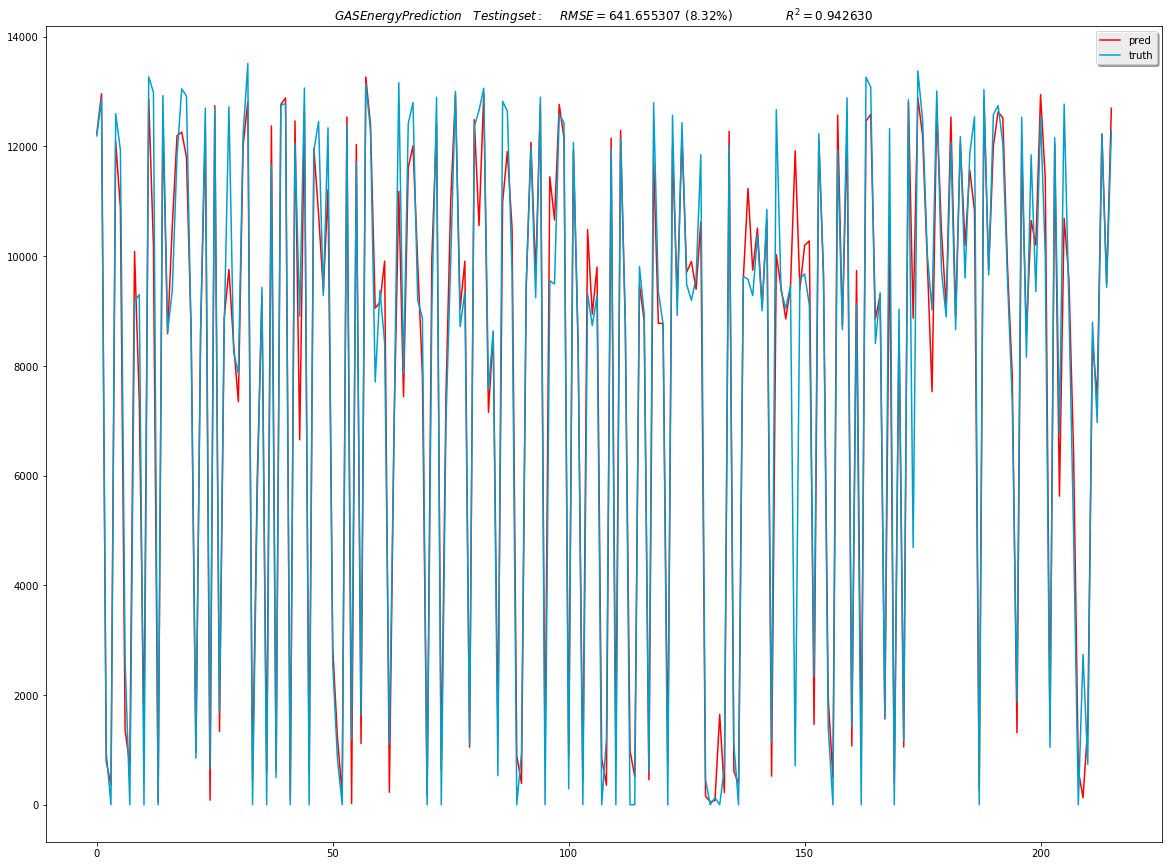

In [37]:
rmse  = (np.sqrt((y_test-preds)**2)).mean()
score = r2_score(y_test,preds)
mean  = data['天然气'].mean()
ratio = (rmse/mean)*100
plt.figure(figsize=(20,15))
plt.title('$GAS Energy Prediction$   $Testing set:$    $RMSE = %f $ (%.2f%%)              $R^2 = %f$'%(rmse,ratio,score))
plt.plot(preds,c = 'red',label = 'pred',linestyle='-')
plt.plot(y_test,c = '#009FCC',label = 'truth',linestyle='-')
plt.legend(shadow=True)
plt.show()

In [38]:
error_sum = np.sum(y_test-preds)
print(error_sum)

-4259.01952362


In [34]:
data.columns

Index(['电能', '天然气', 'E16', 'E15', 'E2SB', 'LCAR', 'A10', 'E2LB', '均温', '均湿',
       '最高温度', '最低温度', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [47]:
cols=np.array(['EE', 'GAS', 'E16', 'E15', 'E2SB', 'LCAR', 'A10', 'E2LB', 'TEMP', 'HUM',
       'max_TEMP', 'min_TEMP', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7'])
temp = data.values
data = temp[:,:19-7]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [48]:
cols=np.array(['EE', 'GAS', 'E16', 'E15', 'E2SB', 'LCAR', 'A10', 'E2LB', 'TEMP', 'HUM',
       'max_TEMP', 'min_TEMP'])
data = data[:,:12]

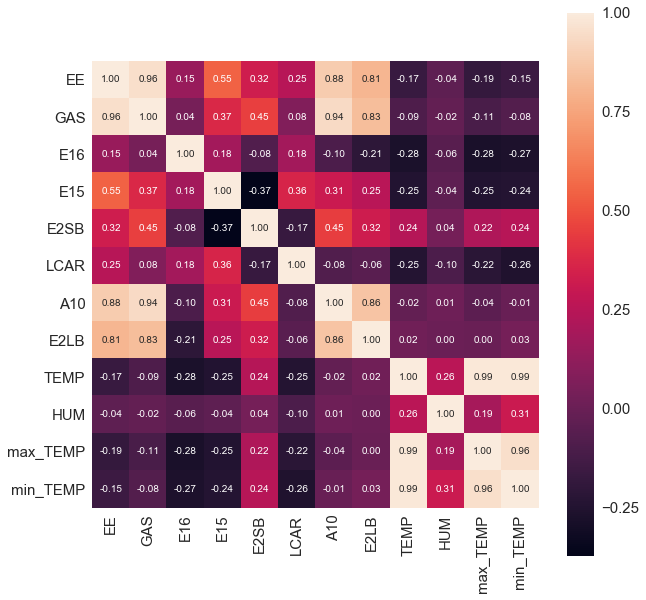

In [50]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(data.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()